In [1]:
import xarray as xr

In [2]:
# %%time

# etopo05 = xr.open_dataset("https://data.pmel.noaa.gov/pmel/thredds/dodsC/data/PMEL/etopo5.nc").load()
# etopo05.to_netcdf("etopo05.nc")

In [3]:
etopo05 = xr.open_dataset("etopo05.nc")
etopo05 = etopo05.rename({
    "ETOPO05_X": "longitude",
    "ETOPO05_Y": "latitude",
    "ROSE": "rose",
})
etopo05

<xarray.Dataset>
Dimensions:    (longitude: 4320, latitude: 2161)
Coordinates:
  * longitude  (longitude) float64 0.0 0.08333 0.1667 0.25 ... 359.8 359.8 359.9
  * latitude   (latitude) float64 -90.0 -89.92 -89.83 ... 89.83 89.92 90.0
Data variables:
    rose       (latitude, longitude) float32 ...
Attributes:
    history:        FERRET V5.22   27-Apr-01, from IRI/LDEO worldbath.nc
    IRI_LDEO_note:  updated 27 Feb 1998 from NGDC CD-ROM 29 April 1993

In [4]:
etopo05 = etopo05.isel(
    latitude=slice(None, None, 20),
    longitude=slice(None, None, 20),
)
etopo05

<xarray.Dataset>
Dimensions:    (longitude: 216, latitude: 109)
Coordinates:
  * longitude  (longitude) float64 0.0 1.667 3.333 5.0 ... 355.0 356.7 358.3
  * latitude   (latitude) float64 -90.0 -88.33 -86.67 -85.0 ... 86.67 88.33 90.0
Data variables:
    rose       (latitude, longitude) float32 ...
Attributes:
    history:        FERRET V5.22   27-Apr-01, from IRI/LDEO worldbath.nc
    IRI_LDEO_note:  updated 27 Feb 1998 from NGDC CD-ROM 29 April 1993

In [5]:
from skimage.measure import find_contours
from copy import deepcopy

In [6]:
etopo05_shifted = deepcopy(etopo05)
etopo05_shifted.coords["longitude"] = etopo05_shifted.coords["longitude"] + 360.0

In [7]:
etopo05_rep = xr.concat((etopo05, etopo05_shifted), dim="longitude")

In [8]:
import numpy as np

In [9]:
contours = find_contours(etopo05_rep.rose.data, -50)

In [10]:
from matplotlib import pyplot as plt
import numpy as np

In [11]:
contours_latlon = [
    np.stack((
        etopo05_rep.longitude[np.round(contours[n][:, 1]).astype(int)],
        etopo05_rep.latitude[np.round(contours[n][:, 0]).astype(int)]
    ), axis=1
    ) for n in range(len(contours))
]

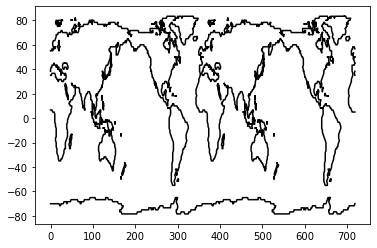

In [12]:
for n in range(len(contours_latlon)):
    plt.plot(
        contours_latlon[n][:, 0],
        contours_latlon[n][:, 1],
        'k-',
    )

In [13]:
from shapely.geometry import Polygon

In [14]:
polys = list(map(Polygon, contours_latlon))
# polys = list(filter(lambda p: p.is_valid, polys))
len(polys)

181

In [15]:
areas = [p.area for p in polys]

In [16]:
polys = sorted(polys, key=lambda p: p.area)[::-1]

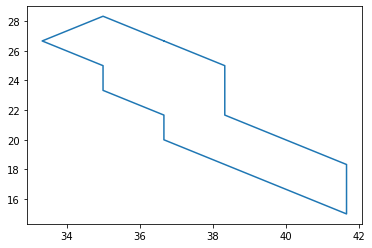

In [17]:
plt.plot(*polys[20].exterior.xy)

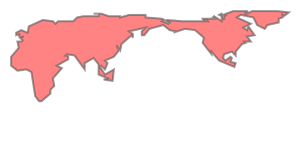

In [18]:
polys[0].simplify(2.0)

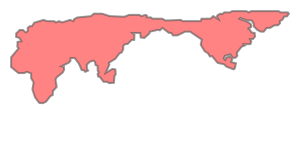

In [19]:
polys[0].buffer(2).simplify(1.0)